# Corporate Prosecution - Exercise B

#### Summary

Looking at corporate prosecutions over time, and the possible assignment of a compliance officer.

#### Files

- cpr-data.xls, "detailed information about every federal organizational prosecution since 2001, as well as deferred and non-prosecution agreements with organizations since 1990"

#### Data Source(s)

The UVA School of Law publishees a [Corpoate Prosecution Registry](http://lib.law.virginia.edu/Garrett/corporate-prosecution-registry/about.html) 

> The goal of this Corporate Prosecutions Registry is to provide comprehensive and up-to-date information on federal organizational prosecutions in the United States, so that we can better understand how corporate prosecutions are brought and resolved. We include detailed information about every federal organizational prosecution since 2001, as well as deferred and non-prosecution agreements with organizations since 1990.

[Corpoate Prosecution Registry](http://lib.law.virginia.edu/Garrett/corporate-prosecution-registry/about.html) 

#### Skills

- Working with CSV files
- Counting and summarizing columns
- Searching with strings
- Extracting with strings

# Read in `cpr-data.csv`

In [1]:
import pandas as pd 
df = pd.read_csv("cpr-data.csv")
df.head()

,REC_ID,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,SWISS_BANK_PROGRAM,USAO,COUNTRY,FINANCIAL_INSTITUTION,CASE_NAME,CASE_ID,...,PRIVACY_WAIVER,REGULATORY_DISGORGEMENT_RESTITUTION_FORFEITURE,REGULATORY_FINE,REG_AGENCY,STATEMENT_OF_FACTS,TOTAL_REGULATORY,UNRELATED_TERMS,AGMT_YEAR,SOURCE,NOTES
0,138,"1st Union Transfer and Telegraph, Inc.",plea,Money Laundering,NaN,Virginia - Eastern District,United States,Yes,USA v. 1st Union Transfer,4:03-cr-00024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.0,PACER,NaN
1,139,"3D Poultry Loading, Inc.",plea,Immigration,NaN,Arkansas - Western District,United States,No,USA v. 3D Poultry Loading,2:04-cr-20061,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.0,PACER,NaN
2,2529,"3rd & Bell, LLC",plea,Immigration,NaN,Arizona,United States,No,USA v. Danny's Management Services LLC et al,2:13-cr-01143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,PACER,NaN
3,822,41 Market Inc.,plea,Controlled substances / Drugs / Meth Act,NaN,Georgia - Northern District,United States,No,USA v. 41 Market Inc.,4:06-cr-00023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.0,PACER,NaN
4,140,"45,000, Inc.",plea,Environmental,NaN,Louisiana - Middle District,United States,No,USA v. 45000 Inc,3:04-cr-00180,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.0,PACER,NaN


### Check that your dataframe has 3038 rows and 56 columns.

In [2]:
df.shape

(3038, 56)

### List the columns and their data types

In [3]:
df.dtypes

REC_ID                                                                      int64
COMPANY                                                                    object
DISPOSITION_TYPE                                                           object
PRIMARY_CRIME_CODE                                                         object
SWISS_BANK_PROGRAM                                                         object
USAO                                                                       object
COUNTRY                                                                    object
FINANCIAL_INSTITUTION                                                      object
CASE_NAME                                                                  object
CASE_ID                                                                    object
DOCKET_NO                                                                  object
DATE                                                                       object
JUDGMENT_DATE   

### What do the following columns mean?

- PRIMARY_CRIME_CODE
- DISPOSITION_TYPE
- AGREEMENT_TYPE
- COUNTRY
- FINE
- TOTAL_PAYMENT
- USAO
- PROBATION_LENGTH
- AGREEMENT_REQUIRED_NEW_POSITIONS
- INDEP_MONITOR_REQUIRED

In [4]:
#PRIMARY_CRIME_CODE : This can include fraud etc
#DISPOSITION_TYPE: Indicates whether the prosecution was resolved through a type of agreement
#AGREEMENT_TYPE: Indicates whether the agreement is a plea ("plea"), non-prosecution agreement ("NP"), or deferred prosecution agreement ("DP")
#COUNTRY: Country in which the entity was incorporated.
#FINE: Amount of fine in U.S. dollars
#TOTAL_PAYMENT: Sum of all monetary penalties (i.e. fines, restitution, forfeiture, disgorgements, community service, etc.)
#USAO: U.S. Attorney's Offices involved in the prosecution. Multiple entries are separated by a "|".
#PROBATION_LENGTH: Length of probation in months
#AGREEMENT_REQUIRED_NEW_POSITIONS: the agreement stated that new positions be created at a firm, typically related to compliance
#INDEP_MONITOR_REQUIRED: does the agreement require that an independent actor be retained to supervise implementation of a compliance program

# Customizing the display in pandas

See how the middle of the table has a `...`? Let's fix that.

## How do you see the number of columns pandas will display?

In [4]:
df.columns

Index(['REC_ID', 'COMPANY', 'DISPOSITION_TYPE', 'PRIMARY_CRIME_CODE',
       'SWISS_BANK_PROGRAM', 'USAO', 'COUNTRY', 'FINANCIAL_INSTITUTION',
       'CASE_NAME', 'CASE_ID', 'DOCKET_NO', 'DATE', 'JUDGMENT_DATE',
       'PLEA_DATE', 'TICKER', 'US_PUBLIC_CO',
       'ADDITIONAL_REGULATORY_FINE_OR_PAYMENT', 'COMMUNITY_SERVICE_OR_OTHER',
       'FINE', 'FORFEITURE_DISGORGEMENT', 'PROBATION_LENGTH', 'RESTITUTION',
       'TOTAL_PAYMENT', 'ACCEPTS_RESPONSIBILITY',
       'AGREEMENT_REQUIRED_NEW_POSITIONS',
       'AGREEMENT_REQUIRED_OUTSIDE_AUDITORS_OR_EXPERTS',
       'CITATION_AND_DESCRIPTION', 'CIVIL_JUDGMENT_OR_SETTLEMENT',
       'COMPLIANCE_PROGRAM_DESCRIPTION',
       'COMPLIANCE_PROGRAM_REQUIRED_BY_AGREEMENT',
       'COMPLIANCE_REQUIRED_BY_REGULATORS', 'CRIME_DESC',
       'DESCRIPTION_OF_PAYMENTS',
       'DOES_AGREEMENT_DISCUSS_REASONS_OR_RELEVENT_CONSIDERATIONS_FOR_LENIENCY',
       'DOJ_CAN_UNILATERALLY_TERMINATE', 'FINE_CALCULATION_INCLUDED',
       'FINE_DESCRIPTION', 'INDEP_M

## Set pandas to display 65 columns

In [5]:
pd.set_option("display.max_columns", 65)

In [6]:
df.head()

,REC_ID,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,SWISS_BANK_PROGRAM,USAO,COUNTRY,FINANCIAL_INSTITUTION,CASE_NAME,CASE_ID,DOCKET_NO,DATE,JUDGMENT_DATE,PLEA_DATE,TICKER,US_PUBLIC_CO,ADDITIONAL_REGULATORY_FINE_OR_PAYMENT,COMMUNITY_SERVICE_OR_OTHER,FINE,FORFEITURE_DISGORGEMENT,PROBATION_LENGTH,RESTITUTION,TOTAL_PAYMENT,ACCEPTS_RESPONSIBILITY,AGREEMENT_REQUIRED_NEW_POSITIONS,AGREEMENT_REQUIRED_OUTSIDE_AUDITORS_OR_EXPERTS,CITATION_AND_DESCRIPTION,CIVIL_JUDGMENT_OR_SETTLEMENT,COMPLIANCE_PROGRAM_DESCRIPTION,COMPLIANCE_PROGRAM_REQUIRED_BY_AGREEMENT,COMPLIANCE_REQUIRED_BY_REGULATORS,CRIME_DESC,DESCRIPTION_OF_PAYMENTS,DOES_AGREEMENT_DISCUSS_REASONS_OR_RELEVENT_CONSIDERATIONS_FOR_LENIENCY,DOJ_CAN_UNILATERALLY_TERMINATE,FINE_CALCULATION_INCLUDED,FINE_DESCRIPTION,INDEP_MONITOR_REQUIRED,MUST_COMPORT_WITH_USSG_OR_AUDIT_COMPLIANCE,OTHER_AGREEMENT,OTHER_AGREEMENT_REQUIRED_GOVERNANCE_CHANGES,OTHER_COMPLIANCE_OFFICER_OR_CONSULTANT_REQUIRED,PARALLEL_CIVIL_SUIT,PARALLEL_REGULATORY_ACTION_OR_LOCAL_PROSECUTOR,PRE_AGREEMENT_COMPLIANCE,PRE_AGREEMENT_COMPLIANCE_DESCRIPTION,PRIVACY_WAIVER,REGULATORY_DISGORGEMENT_RESTITUTION_FORFEITURE,REGULATORY_FINE,REG_AGENCY,STATEMENT_OF_FACTS,TOTAL_REGULATORY,UNRELATED_TERMS,AGMT_YEAR,SOURCE,NOTES
0,138,"1st Union Transfer and Telegraph, Inc.",plea,Money Laundering,NaN,Virginia - Eastern District,United States,Yes,USA v. 1st Union Transfer,4:03-cr-00024,8,2003-06-17,2003-06-17,2003-02-28,NaN,No,NaN,NaN,0.0,272734.0,12.0,NaN,272734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.0,PACER,NaN
1,139,"3D Poultry Loading, Inc.",plea,Immigration,NaN,Arkansas - Western District,United States,No,USA v. 3D Poultry Loading,2:04-cr-20061,7,2005-01-25,2005-01-25,2004-09-30,NaN,No,NaN,NaN,24000.0,NaN,36.0,NaN,24000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.0,PACER,NaN
2,2529,"3rd & Bell, LLC",plea,Immigration,NaN,Arizona,United States,No,USA v. Danny's Management Services LLC et al,2:13-cr-01143,510,2014-11-21,2014-11-21,2014-11-20,NaN,No,0.0,0.0,50.0,0.0,0.0,0.0,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,PACER,NaN
3,822,41 Market Inc.,plea,Controlled substances / Drugs / Meth Act,NaN,Georgia - Northern District,United States,No,USA v. 41 Market Inc.,4:06-cr-00023,11,2006-07-05,2006-07-05,2006-03-16,NaN,No,NaN,NaN,14640.0,NaN,36.0,NaN,14640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.0,PACER,NaN
4,140,"45,000, Inc.",plea,Environmental,NaN,Louisiana - Middle District,United States,No,USA v. 45000 Inc,3:04-cr-00180,17,2005-06-03,2005-06-03,2004-11-22,NaN,No,NaN,NaN,25000.0,NaN,0.0,2500.0,27500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.0,PACER,NaN


## How do you see the number of rows pandas will display? Then, set it to display 100 rows at a time.

What does "the number rows pandas will display" actually mean?

In [7]:
df.head(100)

,REC_ID,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,SWISS_BANK_PROGRAM,USAO,COUNTRY,FINANCIAL_INSTITUTION,CASE_NAME,CASE_ID,DOCKET_NO,DATE,JUDGMENT_DATE,PLEA_DATE,TICKER,US_PUBLIC_CO,ADDITIONAL_REGULATORY_FINE_OR_PAYMENT,COMMUNITY_SERVICE_OR_OTHER,FINE,FORFEITURE_DISGORGEMENT,PROBATION_LENGTH,RESTITUTION,TOTAL_PAYMENT,ACCEPTS_RESPONSIBILITY,AGREEMENT_REQUIRED_NEW_POSITIONS,AGREEMENT_REQUIRED_OUTSIDE_AUDITORS_OR_EXPERTS,CITATION_AND_DESCRIPTION,CIVIL_JUDGMENT_OR_SETTLEMENT,COMPLIANCE_PROGRAM_DESCRIPTION,COMPLIANCE_PROGRAM_REQUIRED_BY_AGREEMENT,COMPLIANCE_REQUIRED_BY_REGULATORS,CRIME_DESC,DESCRIPTION_OF_PAYMENTS,DOES_AGREEMENT_DISCUSS_REASONS_OR_RELEVENT_CONSIDERATIONS_FOR_LENIENCY,DOJ_CAN_UNILATERALLY_TERMINATE,FINE_CALCULATION_INCLUDED,FINE_DESCRIPTION,INDEP_MONITOR_REQUIRED,MUST_COMPORT_WITH_USSG_OR_AUDIT_COMPLIANCE,OTHER_AGREEMENT,OTHER_AGREEMENT_REQUIRED_GOVERNANCE_CHANGES,OTHER_COMPLIANCE_OFFICER_OR_CONSULTANT_REQUIRED,PARALLEL_CIVIL_SUIT,PARALLEL_REGULATORY_ACTION_OR_LOCAL_PROSECUTOR,PRE_AGREEMENT_COMPLIANCE,PRE_AGREEMENT_COMPLIANCE_DESCRIPTION,PRIVACY_WAIVER,REGULATORY_DISGORGEMENT_RESTITUTION_FORFEITURE,REGULATORY_FINE,REG_AGENCY,STATEMENT_OF_FACTS,TOTAL_REGULATORY,UNRELATED_TERMS,AGMT_YEAR,SOURCE,NOTES
0,138,"1st Union Transfer and Telegraph, Inc.",plea,Money Laundering,NaN,Virginia - Eastern District,United States,Yes,USA v. 1st Union Transfer,4:03-cr-00024,8,2003-06-17,2003-06-17,2003-02-28,NaN,No,NaN,NaN,0.0,272734.0,12.0,NaN,272734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.0,PACER,NaN
1,139,"3D Poultry Loading, Inc.",plea,Immigration,NaN,Arkansas - Western District,United States,No,USA v. 3D Poultry Loading,2:04-cr-20061,7,2005-01-25,2005-01-25,2004-09-30,NaN,No,NaN,NaN,24000.0,NaN,36.0,NaN,24000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.0,PACER,NaN
2,2529,"3rd & Bell, LLC",plea,Immigration,NaN,Arizona,United States,No,USA v. Danny's Management Services LLC et al,2:13-cr-01143,510,2014-11-21,2014-11-21,2014-11-20,NaN,No,0.0,0.0,50.0,0.0,0.0,0.0,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,PACER,NaN
3,822,41 Market Inc.,plea,Controlled substances / Drugs / Meth Act,NaN,Georgia - Northern District,United States,No,USA v. 41 Market Inc.,4:06-cr-00023,11,2006-07-05,2006-07-05,2006-03-16,NaN,No,NaN,NaN,14640.0,NaN,36.0,NaN,14640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.0,PACER,NaN
4,140,"45,000, Inc.",plea,Environmental,NaN,Louisiana - Middle District,United States,No,USA v. 45000 Inc,3:04-cr-00180,17,2005-06-03,2005-06-03,2004-11-22,NaN,No,NaN,NaN,25000.0,NaN,0.0,2500.0,27500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.0,PACER,NaN
5,823,4628 Group Inc.,plea,Environmental,NaN,New York - Northern District,United States,No,USA v. 4628 Group Inc.,5:00-cr-00441,8,2001-07-31,2001-07-31,2000-09-20,NaN,No,0.0,NaN,500000.0,0.0,24.0,0.0,500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001.0,PACER,NaN
6,824,"70 North, LLC",plea,Environmental,NaN,Alaska,United States,No,USA v. 70 North LLC,4:13-po-00001,NaN,2013-03-05,2013-03-05,NaN,NaN,No,35.0,0.0,2000.0,0.0,0.0,0.0,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.0,PACER,NaN
7,825,806 Trading Corp.,plea,Other,NaN,New Jersey,United States,No,USA v. 806 TRADING CORPORATION,2:11-cr-00579,8,2012-03-05,2012-03-05,2011-09-06,NaN,No,0.0,0.0,42000.0,0.0,0.0,0.0,42000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.0,PACER,NaN
8,2530,"83rd & Union

## Describe the TOTAL_PAYMENT column to me numerically - maxes, mins, averages.

Do this in **one line.**

In [8]:
df['TOTAL_PAYMENT'].describe()

count    3.038000e+03
mean     2.284273e+07
std      1.556977e+08
min      0.000000e+00
25%      2.189200e+04
50%      2.000000e+05
75%      2.100000e+06
max      4.486800e+09
Name: TOTAL_PAYMENT, dtype: float64

### Oh that's ugly ugly ugly. Set pandas to format floats with 2 decimal points, we probably don't need to be more specific than that. Oh, and tell it to use a `,` in the thousands position!

I'm just going to leave [this here](http://infohost.nmt.edu/~shipman/doc/python27/web/new-str-format.html) for reference. You should definitely come up and ask on the board, though.

In [19]:
pd.set_option("display.float_format", "{:,.2f}".format)
df['TOTAL_PAYMENT'].describe()

count           3,038.00
mean       22,842,732.11
std       155,697,740.02
min                 0.00
25%            21,892.00
50%           200,000.00
75%         2,100,000.00
max     4,486,800,000.00
Name: TOTAL_PAYMENT, dtype: float64

## Look at the fine and the forfeiture disgorgement for the first two rows. Pretty nice!

In [24]:
df['FINE'].head(2)

0        0.00
1   24,000.00
Name: FINE, dtype: float64

In [25]:
df['FORFEITURE_DISGORGEMENT'].head(2)

0   272,734.00
1          nan
Name: FORFEITURE_DISGORGEMENT, dtype: float64

# A little summarizing

## How many of cases actually went to trial? How did most of these cases arrive at a decision?

In [12]:
df['DISPOSITION_TYPE'].value_counts()

plea               2565
NP                  266
DP                  201
declination           2
dismissal             2
trial convicton       2
Name: DISPOSITION_TYPE, dtype: int64

In [13]:
df[df['DISPOSITION_TYPE'].notnull()]

,REC_ID,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,SWISS_BANK_PROGRAM,USAO,COUNTRY,FINANCIAL_INSTITUTION,CASE_NAME,CASE_ID,DOCKET_NO,DATE,JUDGMENT_DATE,PLEA_DATE,TICKER,US_PUBLIC_CO,ADDITIONAL_REGULATORY_FINE_OR_PAYMENT,COMMUNITY_SERVICE_OR_OTHER,FINE,FORFEITURE_DISGORGEMENT,PROBATION_LENGTH,RESTITUTION,TOTAL_PAYMENT,ACCEPTS_RESPONSIBILITY,AGREEMENT_REQUIRED_NEW_POSITIONS,AGREEMENT_REQUIRED_OUTSIDE_AUDITORS_OR_EXPERTS,CITATION_AND_DESCRIPTION,CIVIL_JUDGMENT_OR_SETTLEMENT,COMPLIANCE_PROGRAM_DESCRIPTION,COMPLIANCE_PROGRAM_REQUIRED_BY_AGREEMENT,COMPLIANCE_REQUIRED_BY_REGULATORS,CRIME_DESC,DESCRIPTION_OF_PAYMENTS,DOES_AGREEMENT_DISCUSS_REASONS_OR_RELEVENT_CONSIDERATIONS_FOR_LENIENCY,DOJ_CAN_UNILATERALLY_TERMINATE,FINE_CALCULATION_INCLUDED,FINE_DESCRIPTION,INDEP_MONITOR_REQUIRED,MUST_COMPORT_WITH_USSG_OR_AUDIT_COMPLIANCE,OTHER_AGREEMENT,OTHER_AGREEMENT_REQUIRED_GOVERNANCE_CHANGES,OTHER_COMPLIANCE_OFFICER_OR_CONSULTANT_REQUIRED,PARALLEL_CIVIL_SUIT,PARALLEL_REGULATORY_ACTION_OR_LOCAL_PROSECUTOR,PRE_AGREEMENT_COMPLIANCE,PRE_AGREEMENT_COMPLIANCE_DESCRIPTION,PRIVACY_WAIVER,REGULATORY_DISGORGEMENT_RESTITUTION_FORFEITURE,REGULATORY_FINE,REG_AGENCY,STATEMENT_OF_FACTS,TOTAL_REGULATORY,UNRELATED_TERMS,AGMT_YEAR,SOURCE,NOTES
0,138,"1st Union Transfer and Telegraph, Inc.",plea,Money Laundering,NaN,Virginia - Eastern District,United States,Yes,USA v. 1st Union Transfer,4:03-cr-00024,8,2003-06-17,2003-06-17,2003-02-28,NaN,No,nan,nan,0.00,"272,734.00",12.00,nan,272734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,003.00",PACER,NaN
1,139,"3D Poultry Loading, Inc.",plea,Immigration,NaN,Arkansas - Western District,United States,No,USA v. 3D Poultry Loading,2:04-cr-20061,7,2005-01-25,2005-01-25,2004-09-30,NaN,No,nan,nan,"24,000.00",nan,36.00,nan,24000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,005.00",PACER,NaN
2,2529,"3rd & Bell, LLC",plea,Immigration,NaN,Arizona,United States,No,USA v. Danny's Management Services LLC et al,2:13-cr-01143,510,2014-11-21,2014-11-21,2014-11-20,NaN,No,0.00,0.00,50.00,0.00,0.00,0.00,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,014.00",PACER,NaN
3,822,41 Market Inc.,plea,Controlled substances / Drugs / Meth Act,NaN,Georgia - Northern District,United States,No,USA v. 41 Market Inc.,4:06-cr-00023,11,2006-07-05,2006-07-05,2006-03-16,NaN,No,nan,nan,"14,640.00",nan,36.00,nan,14640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,006.00",PACER,NaN
4,140,"45,000, Inc.",plea,Environmental,NaN,Louisiana - Middle District,United States,No,USA v. 45000 Inc,3:04-cr-00180,17,2005-06-03,2005-06-03,2004-11-22,NaN,No,nan,nan,"25,000.00",nan,0.00,"2,500.00",27500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,005.00",PACER,NaN
5,823,4628 Group Inc.,plea,Environmental,NaN,New York - Northern District,United States,No,USA v. 4628 Group Inc.,5:00-cr-00441,8,2001-07-31,2001-07-31,2000-09-20,NaN,No,0.00,nan,"500,000.00",0.00,24.00,0.00,500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,001.00",PACER,NaN
6,824,"70 North, LLC",plea,Environmental,NaN,Alaska,United States,No,USA v. 70 North LLC,4:13-po-00001,NaN,2013-03-05,2013-03-05,NaN,NaN,No,35.00,0.00,"2,000.00",0.00,0.00,0.00,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,013.00",PACER,NaN
7,825,806 Trading Corp.,plea,Other,NaN,New Jersey,United States,No,USA v. 806 TRADING CORPORATION,2:11-cr-00579,8,2012-03-05,2012-03-05,2011-09-06,NaN,No,0.00,0.00,"42,000.00",0.00,0.00,0.00,42000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### Graph the previous answer, with the longest bar on top

In [32]:
%matplotlib inline

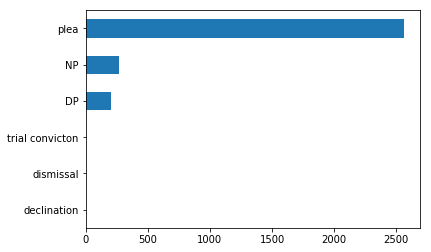

In [33]:
df['DISPOSITION_TYPE'].value_counts().sort_values(ascending = True).plot(kind='barh')

## What's the distribution of total payments look like?

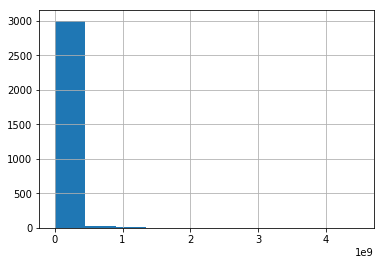

In [34]:
df['TOTAL_PAYMENT'].hist()

## Sort by total payments, descending

In [35]:
df['TOTAL_PAYMENT'].sort_values(ascending=False)

307     4486800000
309     4000000000
2913    2800000000
1000    2003000000
753     1803488986
1454    1700000000
2167    1300000000
1238    1256000000
2760    1200000000
1168     999999400
636      925000000
1154     900000000
164      772290000
75       715000000
358      710000000
61       698500000
675      641000000
852      625000000
957      615000000
2031     612000000
2815     580000000
2331     569000000
851      553633153
1452     550000000
2722     546000000
335      542000000
458      537731535
959      515000000
2687     512788345
33       505000000
           ...    
1882             0
1157             0
1861             0
896              0
1829             0
2333             0
889              0
1200             0
327              0
1826             0
2697             0
659              0
658              0
2133             0
1195             0
2688             0
2680             0
1859             0
2131             0
1840             0
1180             0
2666        

# Column selection

We wanted to view all of those rows, but honestly that's a little silly. **We can't actually see the data we want!** Let's just select the ones we care about.

## Create a new dataframe that only includes the company name, disposition type, total payment, and date.

In [36]:
new_df = df[['COMPANY', 'DISPOSITION_TYPE', 'TOTAL_PAYMENT', 'DATE']].copy()
new_df.head()

,COMPANY,DISPOSITION_TYPE,TOTAL_PAYMENT,DATE
0,"1st Union Transfer and Telegraph, Inc.",plea,272734,2003-06-17
1,"3D Poultry Loading, Inc.",plea,24000,2005-01-25
2,"3rd & Bell, LLC",plea,50,2014-11-21
3,41 Market Inc.,plea,14640,2006-07-05
4,"45,000, Inc.",plea,27500,2005-06-03


## Confirm it has 3038 rows and 5 columns

In [37]:
new_df.shape

(3038, 4)

## Using this subset, extract the year into a separate column called `year`

Your machine will complain. **Let's talk about that error.**

In [38]:
year = new_df['DATE'].str.extract("(\d\d\d\d)")
year

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


0       2003
1       2005
2       2014
3       2006
4       2005
5       2001
6       2013
7       2012
8       2014
9       2014
10      2001
11      2014
12      2003
13       NaN
14      2012
15      2013
16      2011
17      2004
18      2005
19      2009
20      2016
21      2012
22      2005
23      2008
24      2010
25      2010
26      2001
27      2004
28      2004
29      2012
        ... 
3008    2008
3009    2015
3010    2011
3011    2015
3012    2013
3013    2013
3014    2001
3015    2007
3016    2012
3017    2011
3018    2002
3019    2015
3020    2007
3021    2008
3022    2007
3023    2013
3024    2014
3025    2006
3026    2014
3027    2014
3028    2008
3029    2015
3030    2013
3031    2000
3032    2005
3033    2007
3034    2015
3035    2016
3036    2008
3037    2014
Name: DATE, Length: 3038, dtype: object

In [39]:
new_df['YEAR'] = year
new_df

,COMPANY,DISPOSITION_TYPE,TOTAL_PAYMENT,DATE,YEAR
0,"1st Union Transfer and Telegraph, Inc.",plea,272734,2003-06-17,2003
1,"3D Poultry Loading, Inc.",plea,24000,2005-01-25,2005
2,"3rd & Bell, LLC",plea,50,2014-11-21,2014
3,41 Market Inc.,plea,14640,2006-07-05,2006
4,"45,000, Inc.",plea,27500,2005-06-03,2005
5,4628 Group Inc.,plea,500000,2001-07-31,2001
6,"70 North, LLC",plea,2000,2013-03-05,2013
7,806 Trading Corp.,plea,42000,2012-03-05,2012
8,"83rd & Union Hills, LLC",plea,50,2014-11-24,2014
9,"84th & Bell, LLC",plea,50,2014-11-24,2014


## Make the 'year' column an integer.

Or at least *try*, then turn it into a float. Why did one work but the other didn't?

In [40]:
new_df['YEAR'] = new_df['YEAR'].astype(float)

## Make a histogram of cases over the years

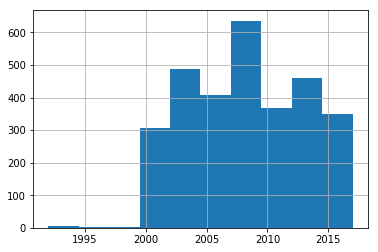

In [41]:
new_df['YEAR'].hist()

## What was the total amount paid across all cases each year?

In [42]:
new_df.groupby('YEAR')['TOTAL_PAYMENT'].describe()

,count,mean,std,min,25%,50%,75%,max
YEAR,,,,,,,,
"1,992.00",1.00,0.00,nan,0.00,0.00,0.00,0.00,0.00
"1,993.00",3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
"1,994.00",2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
"1,996.00",3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
"1,998.00",2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
"1,999.00",1.00,0.00,nan,0.00,0.00,0.00,0.00,0.00
"2,000.00",105.00,"2,649,582.49","8,518,588.63",0.00,"5,000.00","104,000.00","800,000.00","53,000,000.00"
"2,001.00",203.00,"3,752,600.42","23,063,063.23",0.00,"13,500.00","100,000.00","500,000.00","290,000,000.00"
"2,002.00",163.00,"5,088,495.39","44,770,713.35",0.00,"26,750.00","108,955.00","642,500.00","569,000,000.00"


In [43]:
new_df.groupby('YEAR')['TOTAL_PAYMENT'].sum()

YEAR
1,992.00             0
1,993.00             0
1,994.00             0
1,996.00             0
1,998.00             0
1,999.00             0
2,000.00     278206161
2,001.00     761777886
2,002.00     829424749
2,003.00     911162220
2,004.00    1637537063
2,005.00    4210235461
2,006.00    1201775794
2,007.00    3034830498
2,008.00    2729966187
2,009.00    4090513821
2,010.00    4745389066
2,011.00    2957950912
2,012.00    6696816915
2,013.00    7724920476
2,014.00    7062535053
2,015.00    9844845643
2,016.00    3808529923
2,017.00    6866002335
Name: TOTAL_PAYMENT, dtype: int64

## Graph it!

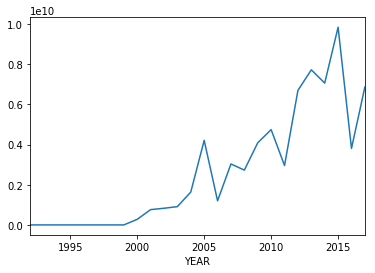

In [44]:
new_df.groupby('YEAR')['TOTAL_PAYMENT'].sum().plot()

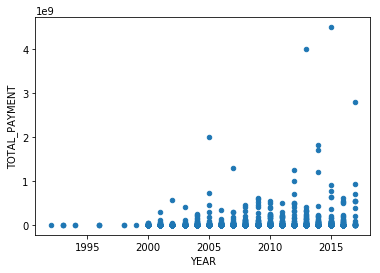

In [45]:
new_df.plot(kind="scatter", x='YEAR', y='TOTAL_PAYMENT')

# Cleaning up a column

Take a look at **AGREEMENT_REQUIRED_NEW_POSITIONS** in your **ORIGINAL DATAFRAME**. How many times does it have a value in it?

- Tip: There are a few ways to do this. Maybe you want to ask for an easy one!

In [46]:
df['AGREEMENT_REQUIRED_NEW_POSITIONS'].value_counts()

No                                                                                                                                                                                                            163
Yes; Assignment one or more senior officers to compliance, with reporting obligations                                                                                                                          46
Yes; Chief Compliance Officer                                                                                                                                                                                   6
Yes; Compliance Officer                                                                                                                                                                                         6
Yes; Compliance officer                                                                                                                                         

### What are the top 5 responses for `AGREEMENT_REQUIRED_NEW_POSITIONS`?

In [47]:
df['AGREEMENT_REQUIRED_NEW_POSITIONS'].value_counts(dropna=False).head(5)

NaN                                                                                      2777
No                                                                                        163
Yes; Assignment one or more senior officers to compliance, with reporting obligations      46
Yes; Chief Compliance Officer                                                               6
Yes; Compliance Officer                                                                     6
Name: AGREEMENT_REQUIRED_NEW_POSITIONS, dtype: int64

## That looks messy.

### HOLD ON, time to learn something

**There are a few ways to do the next question**, but a couple popular methods will have pandas yell at you. You might want to try this new thing called `loc`! **It is used to update a column in a row based on a condition.**

```
df.loc[df.country == 'Angola', "continent"] = "Africa"
```

This updates the `continent` column to be `Africa` for every row where `df.country == 'Angola'`. You CANNOT do the following, which is probably what you've wanted to do:

```
df[df.country == 'Angola']['continent'] = 'Africa'
```

And now you know.

## Start to this up by creating a new column called `required_new_position`.

This column should be `True` if a new position was required, `False` if a new position was not required, and `NaN` if it's unknown.

- Tip: You should use `.str.contains`
- Tip: Do you know how to say "at the start of a line" using regex?
- Tip: We've talked about how to avoid `cannot index with vector containing NA / NaN values` but if you get it feel free to write it on the board

In [48]:
df['REQUIRED_NEW_POSITION'] = df['AGREEMENT_REQUIRED_NEW_POSITIONS'].str.contains("^Yes")
df['REQUIRED_NEW_POSITION']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14        NaN
15        NaN
16        NaN
17        NaN
18        NaN
19        NaN
20        NaN
21        NaN
22        NaN
23       True
24        NaN
25      False
26        NaN
27        NaN
28        NaN
29        NaN
        ...  
3008      NaN
3009      NaN
3010      NaN
3011      NaN
3012      NaN
3013      NaN
3014      NaN
3015      NaN
3016      NaN
3017      NaN
3018      NaN
3019      NaN
3020     True
3021      NaN
3022      NaN
3023      NaN
3024      NaN
3025      NaN
3026      NaN
3027      NaN
3028      NaN
3029      NaN
3030      NaN
3031      NaN
3032      NaN
3033     True
3034      NaN
3035      NaN
3036      NaN
3037      NaN
Name: REQUIRED_NEW_POSITION, Length: 3038, dtype: object

### Confirm that your new column has 163 `True` values and 98 `False` values

In [49]:
df['REQUIRED_NEW_POSITION'].value_counts()

False    163
True      98
Name: REQUIRED_NEW_POSITION, dtype: int64

## Extract the position name into a new column called `new_position`

In [50]:
df['NEW_POSITIONS'] = df[df['REQUIRED_NEW_POSITION'] == True]['AGREEMENT_REQUIRED_NEW_POSITIONS'].str.extract('^Yes;(.*)')
df['NEW_POSITIONS'].dropna()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


23       Assigning "one or more senior corporate offic...
44       Assigning one or more senior corporate offici...
45       Assigning one or more senior corporate offici...
63       Hired fulltime Director, Export Compliance, a...
74       More safety and health department employees; ...
98       Appoinment of executive Chairperson of Board ...
115      Assignment of one or more senior corporate of...
124      Assignment one or more senior officers to com...
147      Assignment one or more senior officers to com...
222      Assignment one or more senior officers to com...
226                                    Compliance officer
235      Assign responsibility to one or more senior o...
245      Assignment one or more senior officers to com...
276                              Chief Compliance Officer
278      Compliance officer, two independent and outsi...
305                   Designate CEO as Compliance officer
320      Assignment one or more senior officers to com...
362           

In [51]:
df[df['REQUIRED_NEW_POSITION'] == True]['NEW_POSITIONS'].head(10)

23      Assigning "one or more senior corporate offic...
30                                                   NaN
44      Assigning one or more senior corporate offici...
45      Assigning one or more senior corporate offici...
63      Hired fulltime Director, Export Compliance, a...
74      More safety and health department employees; ...
98      Appoinment of executive Chairperson of Board ...
115     Assignment of one or more senior corporate of...
124     Assignment one or more senior officers to com...
147     Assignment one or more senior officers to com...
Name: NEW_POSITIONS, dtype: object

## Make sure you extracted correctly

The line below should show at least SIX rows. If it doesn't show any rows, something went wrong!

- Tip: A `.value_counts()` might look okay, even though something is a little off.

In [52]:
df[df.NEW_POSITIONS == " Compliance Officer"]

,REC_ID,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,SWISS_BANK_PROGRAM,USAO,COUNTRY,FINANCIAL_INSTITUTION,CASE_NAME,CASE_ID,DOCKET_NO,DATE,JUDGMENT_DATE,PLEA_DATE,TICKER,US_PUBLIC_CO,ADDITIONAL_REGULATORY_FINE_OR_PAYMENT,COMMUNITY_SERVICE_OR_OTHER,FINE,FORFEITURE_DISGORGEMENT,PROBATION_LENGTH,RESTITUTION,TOTAL_PAYMENT,ACCEPTS_RESPONSIBILITY,AGREEMENT_REQUIRED_NEW_POSITIONS,AGREEMENT_REQUIRED_OUTSIDE_AUDITORS_OR_EXPERTS,CITATION_AND_DESCRIPTION,CIVIL_JUDGMENT_OR_SETTLEMENT,COMPLIANCE_PROGRAM_DESCRIPTION,COMPLIANCE_PROGRAM_REQUIRED_BY_AGREEMENT,COMPLIANCE_REQUIRED_BY_REGULATORS,CRIME_DESC,DESCRIPTION_OF_PAYMENTS,DOES_AGREEMENT_DISCUSS_REASONS_OR_RELEVENT_CONSIDERATIONS_FOR_LENIENCY,DOJ_CAN_UNILATERALLY_TERMINATE,FINE_CALCULATION_INCLUDED,FINE_DESCRIPTION,INDEP_MONITOR_REQUIRED,MUST_COMPORT_WITH_USSG_OR_AUDIT_COMPLIANCE,OTHER_AGREEMENT,OTHER_AGREEMENT_REQUIRED_GOVERNANCE_CHANGES,OTHER_COMPLIANCE_OFFICER_OR_CONSULTANT_REQUIRED,PARALLEL_CIVIL_SUIT,PARALLEL_REGULATORY_ACTION_OR_LOCAL_PROSECUTOR,PRE_AGREEMENT_COMPLIANCE,PRE_AGREEMENT_COMPLIANCE_DESCRIPTION,PRIVACY_WAIVER,REGULATORY_DISGORGEMENT_RESTITUTION_FORFEITURE,REGULATORY_FINE,REG_AGENCY,STATEMENT_OF_FACTS,TOTAL_REGULATORY,UNRELATED_TERMS,AGMT_YEAR,SOURCE,NOTES,REQUIRED_NEW_POSITION,NEW_POSITIONS
441,663,Boeing Co.,NP,Fraud - General,No,"California - Central District,Virginia - Easte...",United States,No,NaN,NaN,NaN,2006-06-01,NaN,NaN,NaN,Yes,0.00,nan,"50,000,000.00",nan,24.00,nan,50000000,Yes,Yes; Compliance Officer,No,Yes (RICO - possession of competitor documents...,NaN,Training; discipline; prohibiting retaliation;...,Yes,Yes; Interim Agreement with Air Force: maintai...,"Federal procurement fraud, conflict of interes...",NaN,Yes; in exchange for good faith performance of...,"No; But ""conduct by a Boeing employee classifi...",No,"$50M penalty, $565M civil settlement; $1.9M to...",Yes,Yes; Periodic auditing of compliance program,Interim Admin. Agmt.,No,Yes,Yes,Yes,Yes,Yes; Changes to ethics and compliance program;...,No,"1,900,000.00","595,000,000.00",National Aeronautics and Space Administration ...,Yes,"596,900,000.00",No,"2,006.00",NaN,Information regarding the Interim Agreement: h...,True,Compliance Officer
664,587,"Columbia Farms, Inc.",DP,Immigration,No,South Carolina,United States,No,NaN,NaN,NaN,2009-11-03,NaN,NaN,NaN,No,"1,500,000.00",nan,0.00,nan,24.00,"1,500,000.00",1500000,Yes,Yes; Compliance Officer,No,NaN,NaN,Designation of compliance officer; ICE reporti...,Yes,NaN,"Immigration, false statements",NaN,"Yes; acceptance of responsibility, compliance,...",Yes,No,$1.5M,No,"Yes; Use of e-Verify program, annual review of...",NaN,No,No,No,NaN,Yes,Yes; Cites significant remedial actions taken ...,No,nan,nan,Dept. of Homeland Security;Dept. of Homeland S...,Yes,0.00,No,"2,009.00",NaN,NaN,True,Compliance Officer
1063,51,Fisher Sand & Gravel / General Steel (subsid.)...,DP,Fraud - Tax,No,USDOJ - Tax Division,United States,No,NaN,NaN,NaN,2009-04-29,NaN,NaN,NaN,No,"668,141.00",nan,"500,000.00",nan,30.00,"668,141.00",1168141,Yes,Yes; Compliance Officer,No,NaN,NaN,Designate Compliance Officer to oversee implem...,Yes,Yes,Tax fraud,NaN,"Yes; acceptance of responsibility, cooperation...",Yes,No,"$668,141 restitution for unpaid lax liability;...",No,Yes; Compliance Officer must evaluate periodic...,NaN,No,No,No,NaN,Yes,Yes; Drafted a Code of Business Ethics,No,nan,nan,Dept. of the Treasury - Internal Revenue Servi...,Yes,0.00,No,"2,009.00",NaN,NaN,True,Compliance Officer
1657,609,Louis Berger Group,DP,Fraud - General,No,New Jersey,United States,Yes,NaN,NaN,NaN,2010-11-05,NaN,NaN,NaN,No,0.00,nan,"18,700,000.00",nan,24.00,nan,18700000,Yes,Yes; Compliance Officer,No,NaN,NaN,"Complaince, training, hotline, new compliance ...",Yes,No,Major Frauds Statute,NaN,"Yes; acceptance of responsibility, cooperation...",Yes,No,NaN,Yes,No,NaN,Yes; New obligations of CFO),Yes,No,No,Yes,"Yes; ""extensive reforms and remedial measures""...",No,nan,nan,Dept. of Justice - Civil Division - Fraud Sect.

## Find all cases that required a compliance officer

That one above only gives us six. We want more! **Find at least 23 cases that required the creation of a compliance officer.**

- Tip: Regular expressions might be your friend here
- Tip: If you get an error about **new_position** not being found, change your code from when you created the column from `df.new_position = ...` to `df['new_position'] = ...`

## View the cases that have a compliance officer again.

This time you shouldn't have a `...` in the middle of your dataframe.

## What were the most popular crimes that required a compliance officer's appointment?

# Make a comparison between two groups in the full dataset

For example, "cases before 2003 were likely to be about this, but after 2003 they became about something else."